<a href="https://colab.research.google.com/github/pankajr141/audio_experiments/blob/master/Experiment_Audio_Filter_Take_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import IPython
import wave
import struct
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
audiofile =  'drive/My Drive/datasets/whistle_withoutac.m4a'

In [0]:
IPython.display.Audio(audiofile)

In [0]:
!pip install pydub
from pydub import AudioSegment

In [0]:
file_extension = 'm4a'
track = AudioSegment.from_file(audiofile, file_extension)
audiofile_wave = audiofile.replace(file_extension, 'wav')
file_handle = track.export(audiofile_wave, format='wav')
print(audiofile_wave)

drive/My Drive/datasets/whistle_withoutac.wav


In [0]:
IPython.display.Audio(audiofile_wave)

In [0]:
wav_file = wave.open(audiofile_wave, 'r')
length = wav_file.getnframes()

data = wav_file.readframes(length)
wav_file.close()

data = struct.unpack('{n}h'.format(n=length), data)
data = np.array(data)
print("Max data:", np.max(data))

# Fast Fourier Transform
data_fft = np.fft.fft(data)
# Above value is in complex number but we want absolute number
# This will give us the frequency we want
frequencies = np.abs(data_fft)
print("The frequency is {} Hz".format(np.argmax(frequencies)))

Max data: 32767
The frequency is 650376 Hz


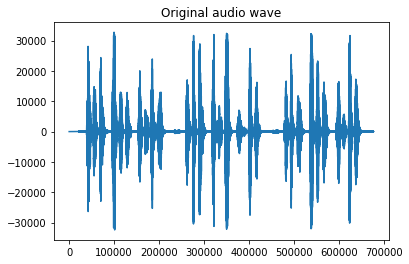

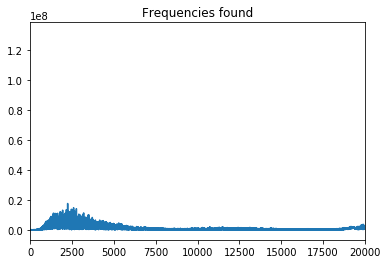

In [0]:
plt.title("Original audio wave")
plt.plot(data)
plt.show()

plt.title("Frequencies found")
plt.plot(frequencies)
plt.xlim(0, 20000)
plt.show()

In [81]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(frequencies)]
filtered_freq = [f for index, f in enumerate(frequencies)]
print("The Max filter frequency is {} Hz".format(np.argmax(filtered_freq)))

# Inverse fast fourier transform
recovered_signal = np.abs(np.fft.ifft(data_fft))

print(recovered_signal)
print("Max data:", np.max(recovered_signal))

nframes=len(recovered_signal)

print(len(recovered_signal))

comptype="NONE"
compname="not compressed"
nchannels=2
sampwidth=2

# The sampling rate of the analog to digital convert 
sampling_rate = 44100
amplitude = 1

filtered_file = "filter.wav"
wav_file=wave.open(filtered_file, 'w') 
# wav_file.setparams((2, 2, 44100, 0, 'NONE', 'not compressed'))

# The tuple should be (nchannels, sampwidth, framerate, nframes, comptype, compname)
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

#Struct is a Python library that takes our data and packs it as binary data. The h in the code means 16 bit number.
for s in recovered_signal:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))
wav_file.close()

IPython.display.Audio(filtered_file)

The Max filter frequency is 650376 Hz
[2.18931098e-12 1.45687889e-12 2.77168857e-12 ... 2.00000000e+00
 1.50000000e+01 9.00000000e+00]
Max data: 32767.00000000001
676864
